In [2]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
csv_path = os.path.join('csv', 'result2_sorted.csv')
df = pd.read_csv(csv_path)
df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
1,MRI_B,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Fail,Pass
2,MRI_C,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
3,MRI_D,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
4,MRI_E,algo_a,Pass,Pass,Pass,Fail,Pass,Fail,Pass,Fail,Pass,Pass,Pass,Fail,Pass,Fail,Fail,Fail,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Fail,Pass,Pass,Pass,Pass
76,MRI_Q,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
77,MRI_R,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass
78,MRI_S,algo_d,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Pass,Fail,Fail,Pass,Pass,Pass,Pass,Pass


In [6]:
# Define all attack column
att_column = df.iloc[:,2:20].columns

# Conver all att coloumn into integer
for x in range(len(att_column)):
    df[att_column[x]] = df[att_column[x]].map({'Pass': 1, 'Fail': 0})

df

,Photo,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,MRI_A,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,MRI_B,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,MRI_C,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,MRI_D,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,MRI_E,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,MRI_P,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
76,MRI_Q,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
77,MRI_R,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
78,MRI_S,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [18]:
df = df.drop(columns = ['Photo'])
df

,Algorithm,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
0,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
1,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,0,1
2,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
3,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
4,algo_a,1,1,1,0,1,0,1,0,1,1,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1
76,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
77,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1
78,algo_d,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1


In [110]:
# df_sum = df.groupby(['Algorithm'], as_index=False).sum()
df_sum = df.groupby(['Algorithm']).sum()
# df_sum = df_sum.transpose()
df_sum

,Averaging,BilateralFiltering,BrightnessDecrease,BrightnessIncrease,CropHorizontal,CropVertical,GaussianBlurring,GaussianNoise,Masks,MedianBlurring,Poisson,Rotate,SaltPeper,ScaleDown,ScaleUp,SharpenFiltering,Speckle,JPG
Algorithm,,,,,,,,,,,,,,,,,,
algo_a,20,20,20,0,20,0,20,0,20,20,20,0,20,0,0,0,19,20
algo_b,0,0,20,20,20,0,0,0,20,0,20,0,20,0,0,0,20,0
algo_c,20,9,20,20,20,0,20,1,20,19,20,0,20,0,0,0,20,20
algo_d,20,20,20,20,20,20,20,17,20,20,20,5,1,15,20,20,20,20


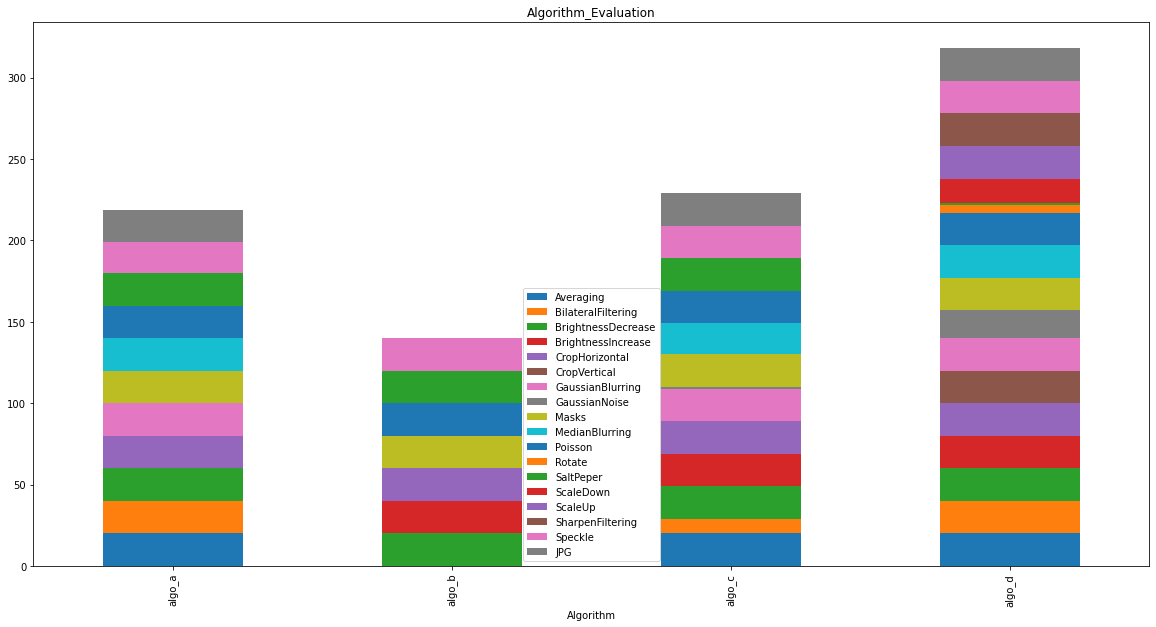

In [112]:
s = df_sum
p1 = s.plot(kind='bar', stacked=True, figsize=(20, 10), title='Algorithm_Evaluation' )

In [105]:
# df_sum = df.groupby(['Algorithm'], as_index=False).sum()
df_sum = df.groupby(['Algorithm']).sum()
df_sum_t = df_sum.transpose()

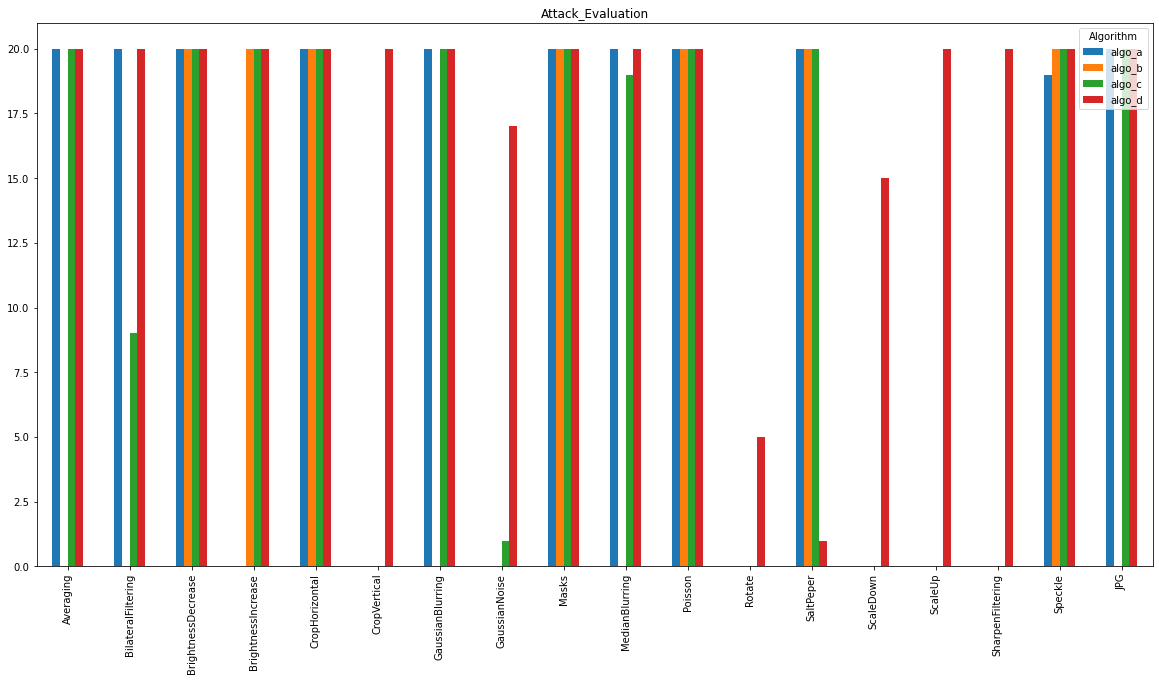

In [107]:
s = df_sum_t
p1 = s.plot(kind='bar', figsize=(20, 10), title='Attack_Evaluation')
# p1 = s.plot(kind='bar', stacked = True, figsize=(20, 10))